In [ ]:
import torch, torchvision
from torchvision import datasets, transforms

In [ ]:
train = datasets.MNIST("",train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("",train = False, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)

testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [ ]:
for data in trainset:
    print(data)
    break

In [ ]:
x,y = data[0][0], data[1][0]

print(y)

tensor(8)


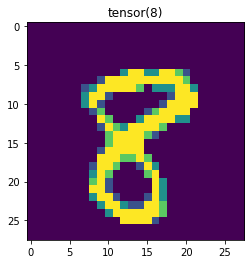

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))
plt.title(y)
plt.show()

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
    print(f"{i}  : {counter_dict[i]/total*100} %")

0  : 9.871666666666666 %
1  : 11.236666666666666 %
2  : 9.93 %
3  : 10.218333333333334 %
4  : 9.736666666666666 %
5  : 9.035 %
6  : 9.863333333333333 %
7  : 10.441666666666666 %
8  : 9.751666666666667 %
9  : 9.915000000000001 %


In [ ]:
import torch.nn as nn, torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim = 1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand(28,28).view(-1,28*28)
output = net(X)
print(output)

tensor([[-2.4916, -2.3255, -2.3024, -2.2823, -2.2815, -2.2646, -2.2446, -2.1953,
         -2.3875, -2.2803]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x,y = data 
        net.zero_grad()
        output = net(x.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2653, grad_fn=<NllLossBackward>)
tensor(0.0081, grad_fn=<NllLossBackward>)
tensor(0.1519, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x,y = data
        output = net(x.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


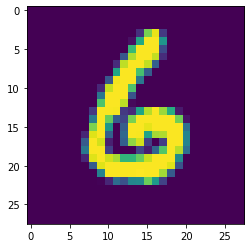

In [ ]:
plt.imshow(x[0].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(x[0].view(-1,28*28))[0]))

tensor(6, grad_fn=<NotImplemented>)
